<a href="https://colab.research.google.com/github/rizkyirw/Credit-Card-Approval/blob/main/Credit_Card_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ujian Associate Data Scientist

Nama Asesi: Isro' Rizky Wibowo

Nama Asesor: Farrikh Alzami

## Latar Belakang Masalah


Disini, **Class (A16) merupakan variable dependent nya (label yang dicari)**.

## Tujuan Ujian Sertifikasi
Tujuan pemanfaatan metode Data Science yang utama didalam kasus ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk:
- Mengidentifikasi variabel kunci yang mempengaruhi persetujuan penerbitan kartu kredit
- Memprediksi persetujuan penerbitan kartu kredit

Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihak rumah sakit dan Pemerintah untuk mengatasi salah satu masalah penting dibidang kesehatan tersebut.

## Terkait Dataset
- Sumber data: https://archive.ics.uci.edu/ml/datasets/Credit+Approval
- Jumlah Sampel Data: 690 records dengan 15 atributes



**Fitur target**:

Class: A16


<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

### setting variabel

In [17]:
ukuran_test = 0.3

## Load Library

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #mencari parameter terbaik

from sklearn.preprocessing import StandardScaler #normalisasi data

from sklearn.metrics import accuracy_score #performa ML nya
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [19]:
pd.set_option('display.max_columns', None) #menampilkan seluruh fitur

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

In [20]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/0_si_2023')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**silakan ubah dataset**

In [21]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BK/0_si_2023/crx.data', header=None)

In [22]:
# dataset = pd.read_csv('https://xxx')

In [23]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


### memasukkan nama fitur kedalam dataset

**silakan dirubah kolom dataset**

In [24]:
dataset.columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"]

In [25]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## BAB 2 – (J.62DMI00.005.1) Menelaah data



### analisis karakteristik data

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


**temuan**: ada beberapa bernilai int64, namun ada yang bernilai Object

### cek deskripsi data

In [27]:
dataset.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [28]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [29]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


**temuan**: dari head dan tail, kita lihat semua berbentuk angka, namun ada yang bernilai `?`, ini yang menyebabkan tipe data menjadi `Object`, maka diperlukan proses untuk merubah `?` menjadi bisa digunakan

### cek distribusi Class

**silakan diganti dengan label yang sesuai**

In [30]:
dataset['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

disini class ....

**temuan**: [distribusi class seimbang]

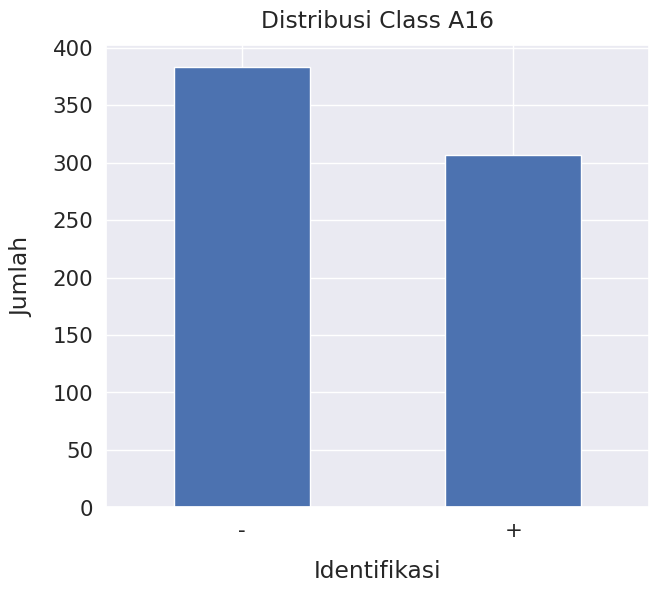

In [31]:
sns.set(font_scale=1.4)
dataset['A16'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Identifikasi", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Class A16", y=1.02);

## Cek Distribusi A2

In [32]:
print(dataset['A2'].value_counts())

?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: A2, Length: 350, dtype: int64


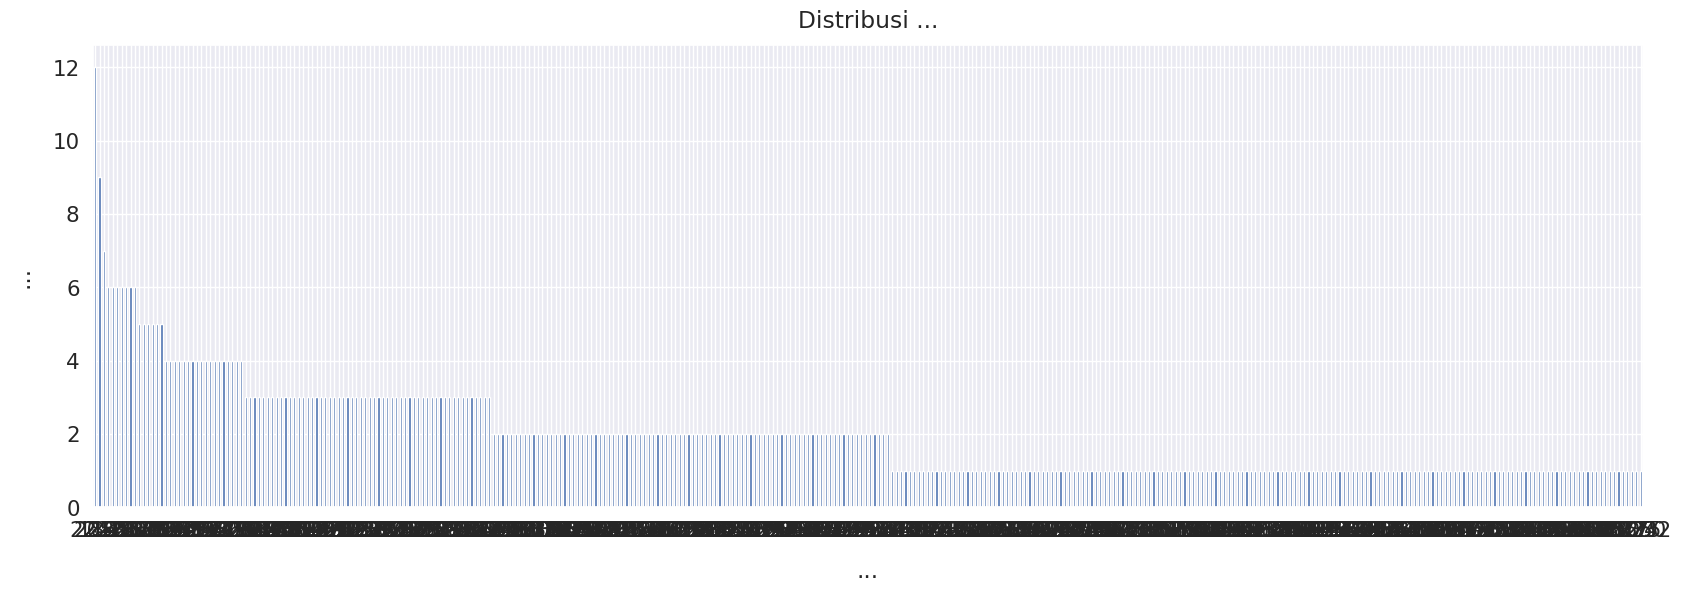

In [33]:
sns.set(font_scale=1.4)
dataset['A2'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("...", labelpad=14)
plt.ylabel("...", labelpad=14)
plt.title("Distribusi ...", y=1.02);

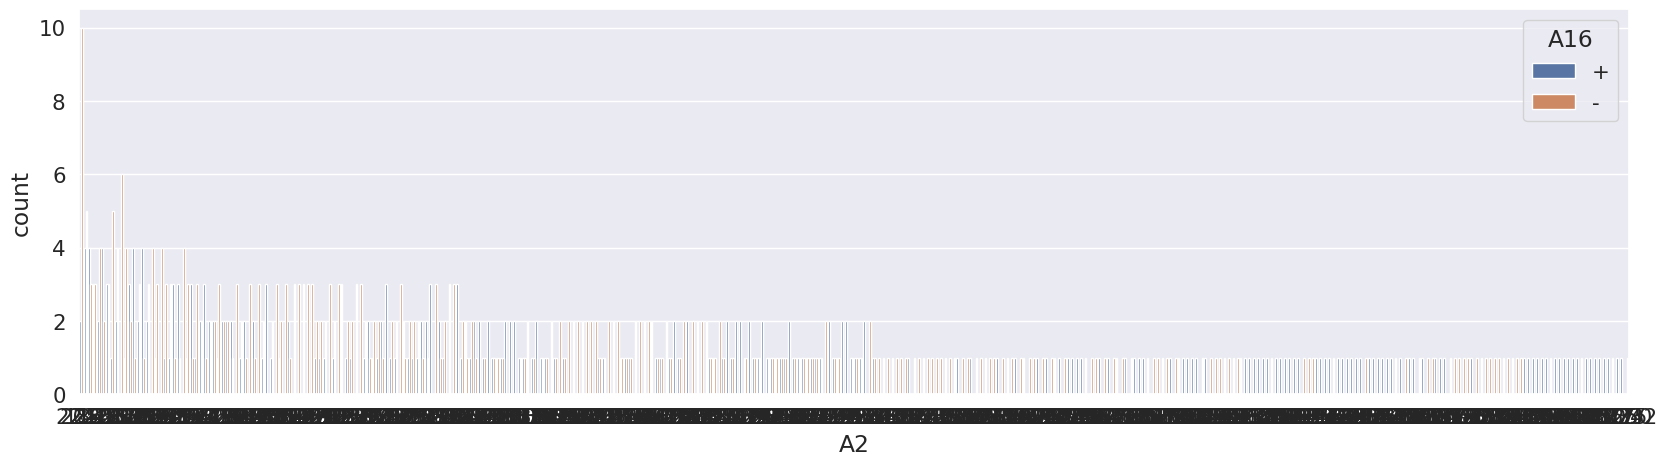

In [34]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A2'],order=dataset['A2'].value_counts().index,hue=dataset['A16'])
plt.show()

## Cek Distribusi A3

In [35]:
print(dataset['A3'].value_counts())

1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: A3, Length: 215, dtype: int64


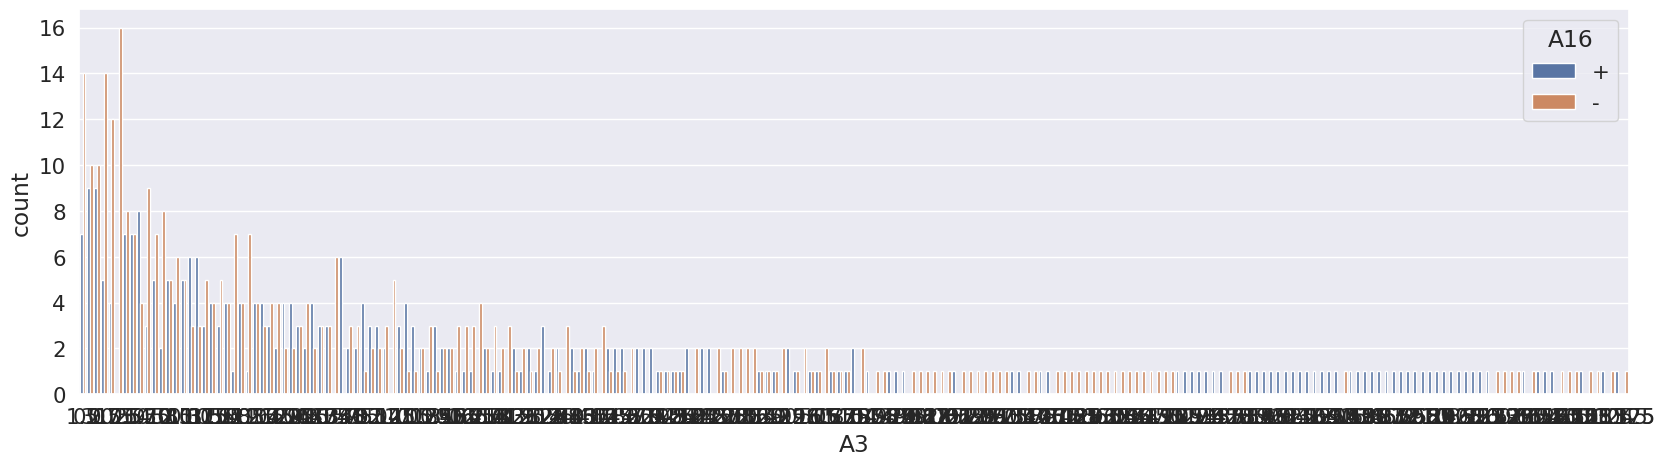

In [36]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A3'],order=dataset['A3'].value_counts().index,hue=dataset['A16'])
plt.show()

## Cek Distribusi A8

In [37]:
print(dataset['A8'].value_counts())

0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
4.165     1
9.000     1
1.960     1
5.125     1
8.290     1
Name: A8, Length: 132, dtype: int64


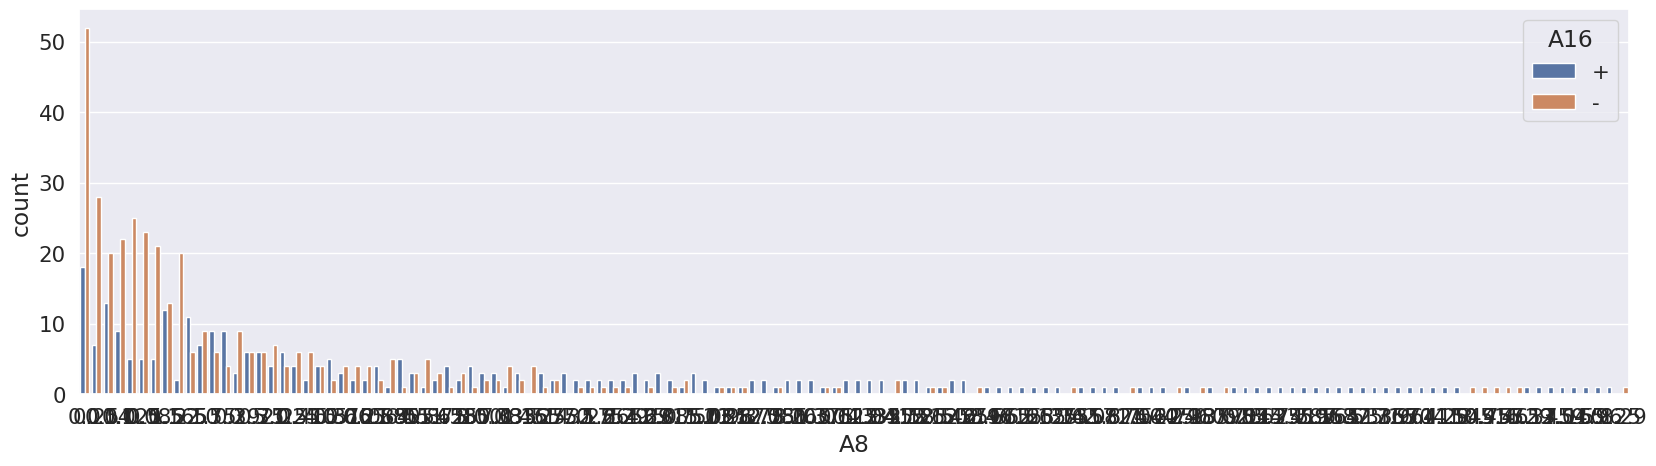

In [38]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A8'],order=dataset['A8'].value_counts().index,hue=dataset['A16'])
plt.show()

## Cek Distribusi A11

In [39]:
print(dataset['A11'].value_counts())

0     395
1      71
2      45
3      28
6      23
11     19
5      18
7      16
4      15
9      10
8      10
10      8
14      8
12      8
15      4
16      3
20      2
17      2
23      1
40      1
67      1
13      1
19      1
Name: A11, dtype: int64


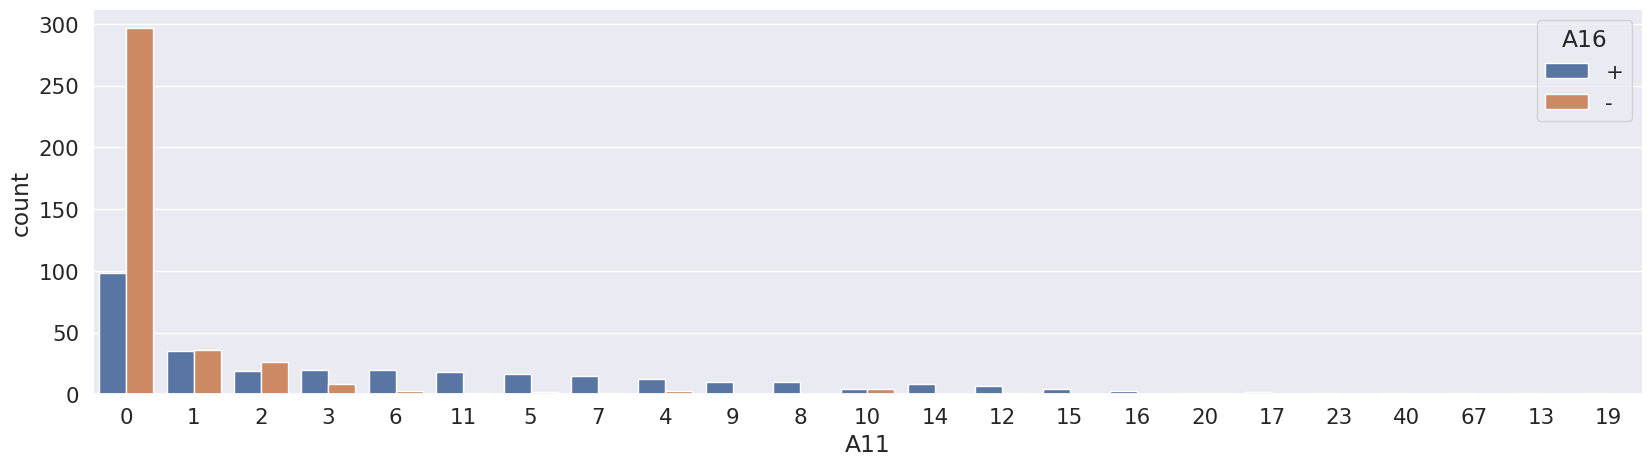

In [40]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A11'],order=dataset['A11'].value_counts().index,hue=dataset['A16'])
plt.show()

## Cek Distribusi A15

In [41]:
print(dataset['A15'].value_counts())

0       295
1        29
500      10
1000     10
2         9
       ... 
1704      1
857       1
6700      1
2503      1
750       1
Name: A15, Length: 240, dtype: int64


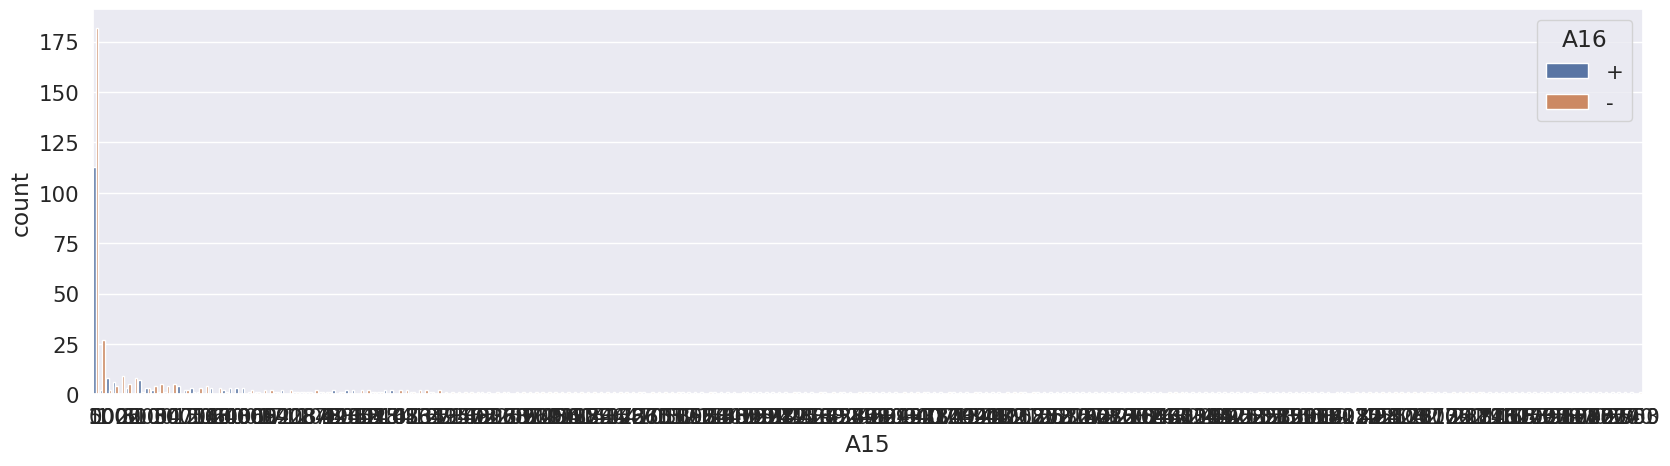

In [42]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['A15'],order=dataset['A15'].value_counts().index,hue=dataset['A16'])
plt.show()

### cek korelasi tahap 1

<ipython-input-43-d16bc9c96ddd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


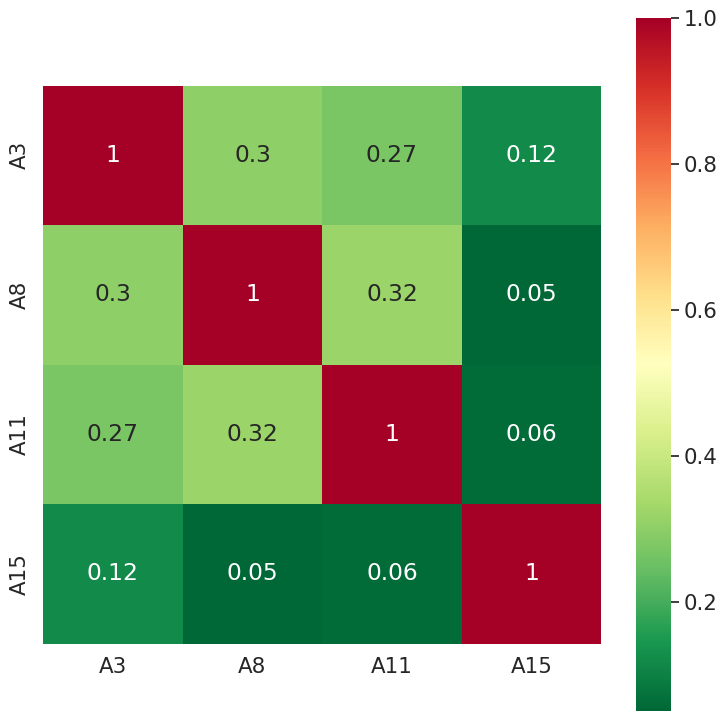

In [43]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

**temuan:**
- ada beberapa fitur yang bernilai `?`, maka dapat kita katakan, bahwa `?` merupakan penanda nilai yang hilang
- korelasi matrix tidak bekerja karena tipe data tidak tepat

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

**temuan**:
- Penilaian kualitas data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- Penilaian tingkat kecukupan data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- ada beberapa fitur yang nilainya hilang, harus digunakan tahapan **`memperbaiki nilai yang hilang`**
- distribusi class **`balanced`**, disini asesi **tidak melakukan proses perbaikan balanced learning**

## BAB 4 – (J.62DMI00.007.1) menentukan object data
Generate table menggunakan https://www.tablesgenerator.com/markdown_tables

**temuan**:

|Nama             | Deskripsi|
|-----------------|---------|
| **A16**       | **Label**   |
| A1             | Atribut |
| A2             | Atribut |
| A3             | Atribut |
| A4 - A15       | Atribut |


## BAB 5 – (J.62DMI00.008.1) membersihkan data

### Memperbaiki nilai yang hilang

nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

**silakan rubah tanda tanya**

In [44]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [45]:
dataset.replace("?", np.nan, inplace= True)

### cek bentuk dataset

In [46]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [47]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


### tahap memperbaiki nilai yang hilang


In [48]:
dataset.isnull().values.any()

True

In [49]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14'], dtype='object')

In [50]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

A1     1.739130
A2     1.739130
A4     0.869565
A5     0.869565
A6     1.304348
A7     1.304348
A14    1.884058
dtype: float64

**temuan**:

<Axes: >

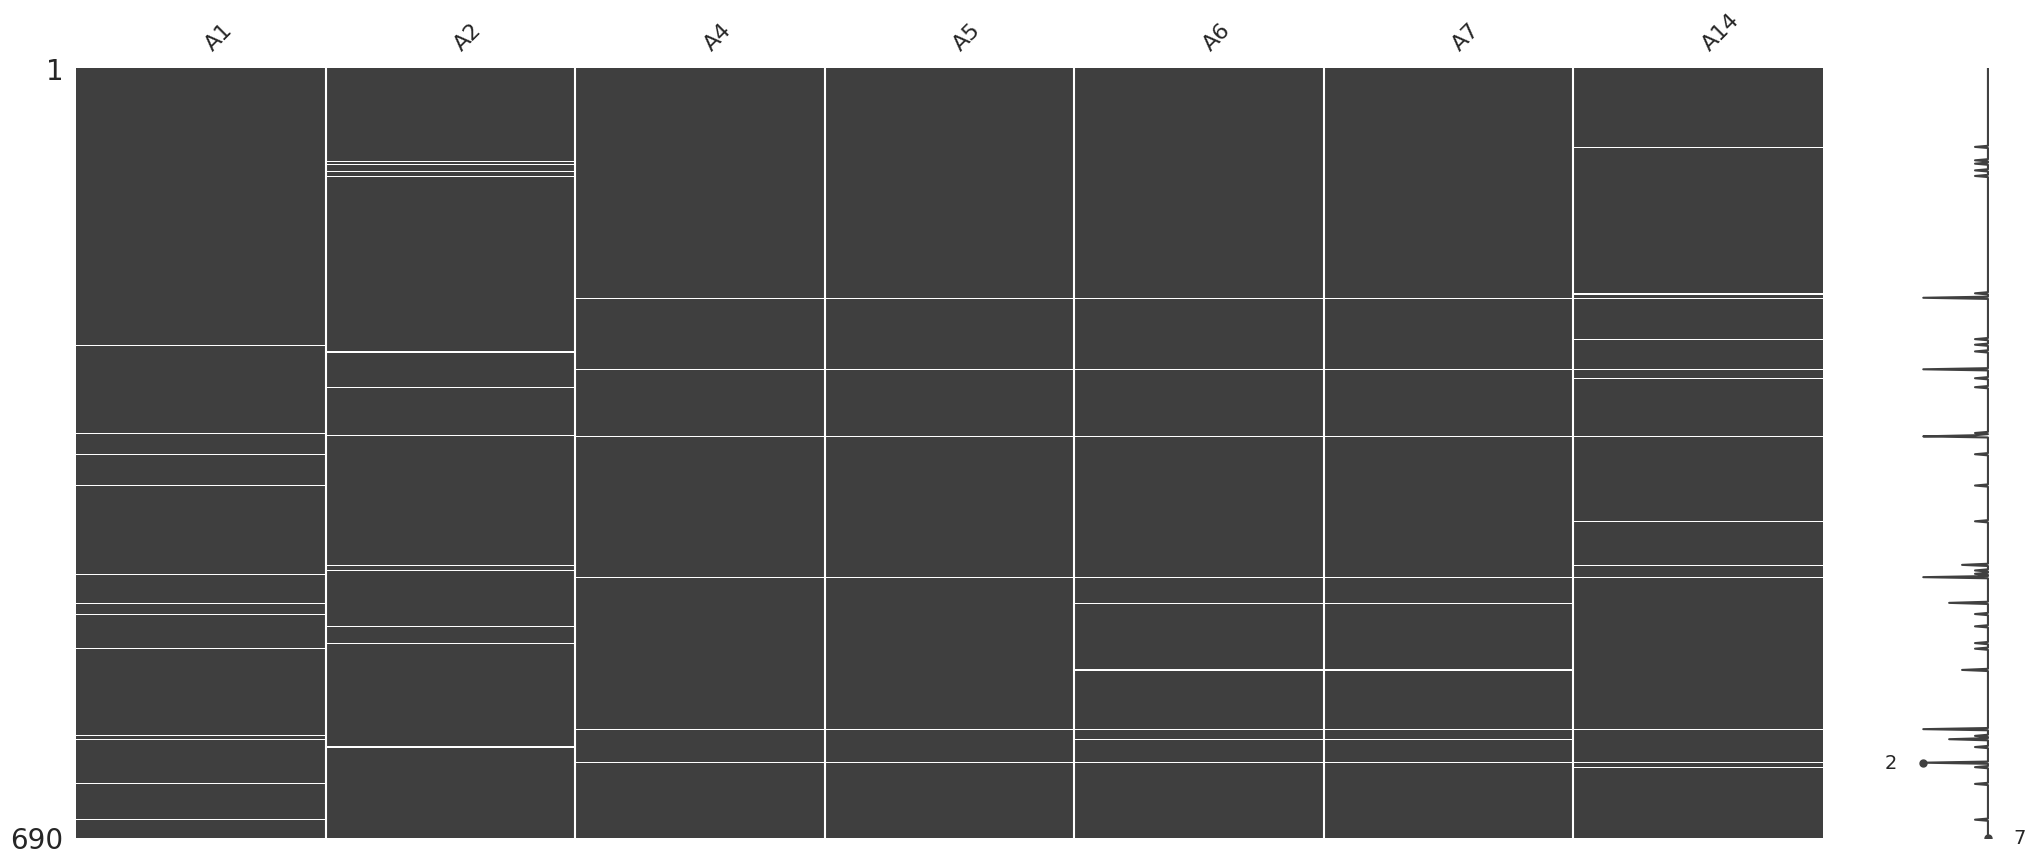

In [51]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

**silakan gunakan sesuai kebutuhan**

In [52]:
# hapus fitur jika fitur yang hilang lebih dari 50%
# dataset.drop(['fitur'], axis="columns", inplace=True)

Median robust terhadap outliers

In [53]:
# Perbaiki A2
median_value=dataset['A2'].median()
dataset['A2']=dataset['A2'].fillna(median_value)

Kalau hilang berupa data huruf bisa pakai mode

In [54]:
dataset['A1'] = dataset['A1'].fillna(dataset['A1'].mode()[0])
dataset['A4'] = dataset['A4'].fillna(dataset['A4'].mode()[0])
dataset['A5'] = dataset['A5'].fillna(dataset['A5'].mode()[0])
dataset['A6'] = dataset['A6'].fillna(dataset['A6'].mode()[0])
dataset['A7'] = dataset['A7'].fillna(dataset['A7'].mode()[0])
dataset['A14'] = dataset['A14'].fillna(dataset['A14'].mode()[0])

cek kembali

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [56]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


**temuan**: meski sudah diperbaiki, namun tipe data masih Object, maka perlu dirubah menjadi int atau Float. untuk menentukan tersebut, perlu dilihat kembali distribusi data

## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data

**silakan pakai sesuai kebutuhan**

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


### Kodifikasi Data

In [58]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")

A1 : ['b' 'a']
A4 : ['u' 'y' 'l']
A5 : ['g' 'p' 'gg']
A6 : ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
A7 : ['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
A9 : ['t' 'f']
A10 : ['t' 'f']
A12 : ['f' 't']
A13 : ['g' 's' 'p']
A16 : ['+' '-']


In [59]:
dataset["A1"]=dataset["A1"].replace({"a":0,"b":1})
dataset["A4"]=dataset["A4"].replace({"u":0,"y":1,"l":2})
dataset["A5"]=dataset["A5"].replace({"g":0,"p":1,"gg":2})
dataset["A6"]=dataset["A6"].replace({"w":1, "q":2,"m":3,"r":4,'cc':5, 'k':6, 'c':7, 'd':8, 'x':9, 'i':10, 'e':11, 'aa':12, 'ff':13, 'j':14})
dataset["A7"]=dataset["A7"].replace({'v':1, 'h':2, 'bb':3, 'ff':4, 'j':5, 'z':6, 'o':7, 'dd':8, 'n':9})
dataset["A9"]=dataset["A9"].replace({"t":1, "f":0})
dataset["A10"]=dataset["A10"].replace({"t":1, "f":0})
dataset["A12"]=dataset["A12"].replace({"t":1, "f":0})
dataset["A13"]=dataset["A13"].replace({"g":1, "s":2, "p":3})
dataset["A16"]=dataset["A16"].replace({"+":1, "-":0})
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,0,0,1,1,1.25,1,1,1,0,1,00202,0,1
1,0,58.67,4.460,0,0,2,2,3.04,1,1,6,0,1,00043,560,1
2,0,24.50,0.500,0,0,2,2,1.50,1,0,0,0,1,00280,824,1
3,1,27.83,1.540,0,0,1,1,3.75,1,1,5,1,1,00100,3,1
4,1,20.17,5.625,0,0,1,1,1.71,1,0,0,0,2,00120,0,1


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 86.4+ KB


In [61]:
dataset['A2'] = dataset['A2'].astype(str).astype(float)

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 86.4+ KB


In [63]:
dataset.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A15,A16
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.242029,0.242029,6.960870,1.847826,2.223406,0.523188,0.427536,2.40000,0.457971,1.105797,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.435342,0.435342,3.802822,1.395110,3.346513,0.499824,0.495080,4.86294,0.498592,0.343458,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,0.000000,0.000000,3.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,0.000000,0.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,0.000000,0.000000,10.000000,2.000000,2.625000,1.000000,1.000000,3.00000,1.000000,1.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,100000.000000,1.000000


### menghapus nilai yang bernilai konstan

In [64]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,0,0,1,1,1.25,1,1,1,0,1,00202,0,1
1,0,58.67,4.460,0,0,2,2,3.04,1,1,6,0,1,00043,560,1
2,0,24.50,0.500,0,0,2,2,1.50,1,0,0,0,1,00280,824,1
3,1,27.83,1.540,0,0,1,1,3.75,1,1,5,1,1,00100,3,1
4,1,20.17,5.625,0,0,1,1,1.71,1,0,0,0,2,00120,0,1


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 86.4+ KB


In [66]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 86.4+ KB


### cek Korelasi

<ipython-input-68-4001db5d4bca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


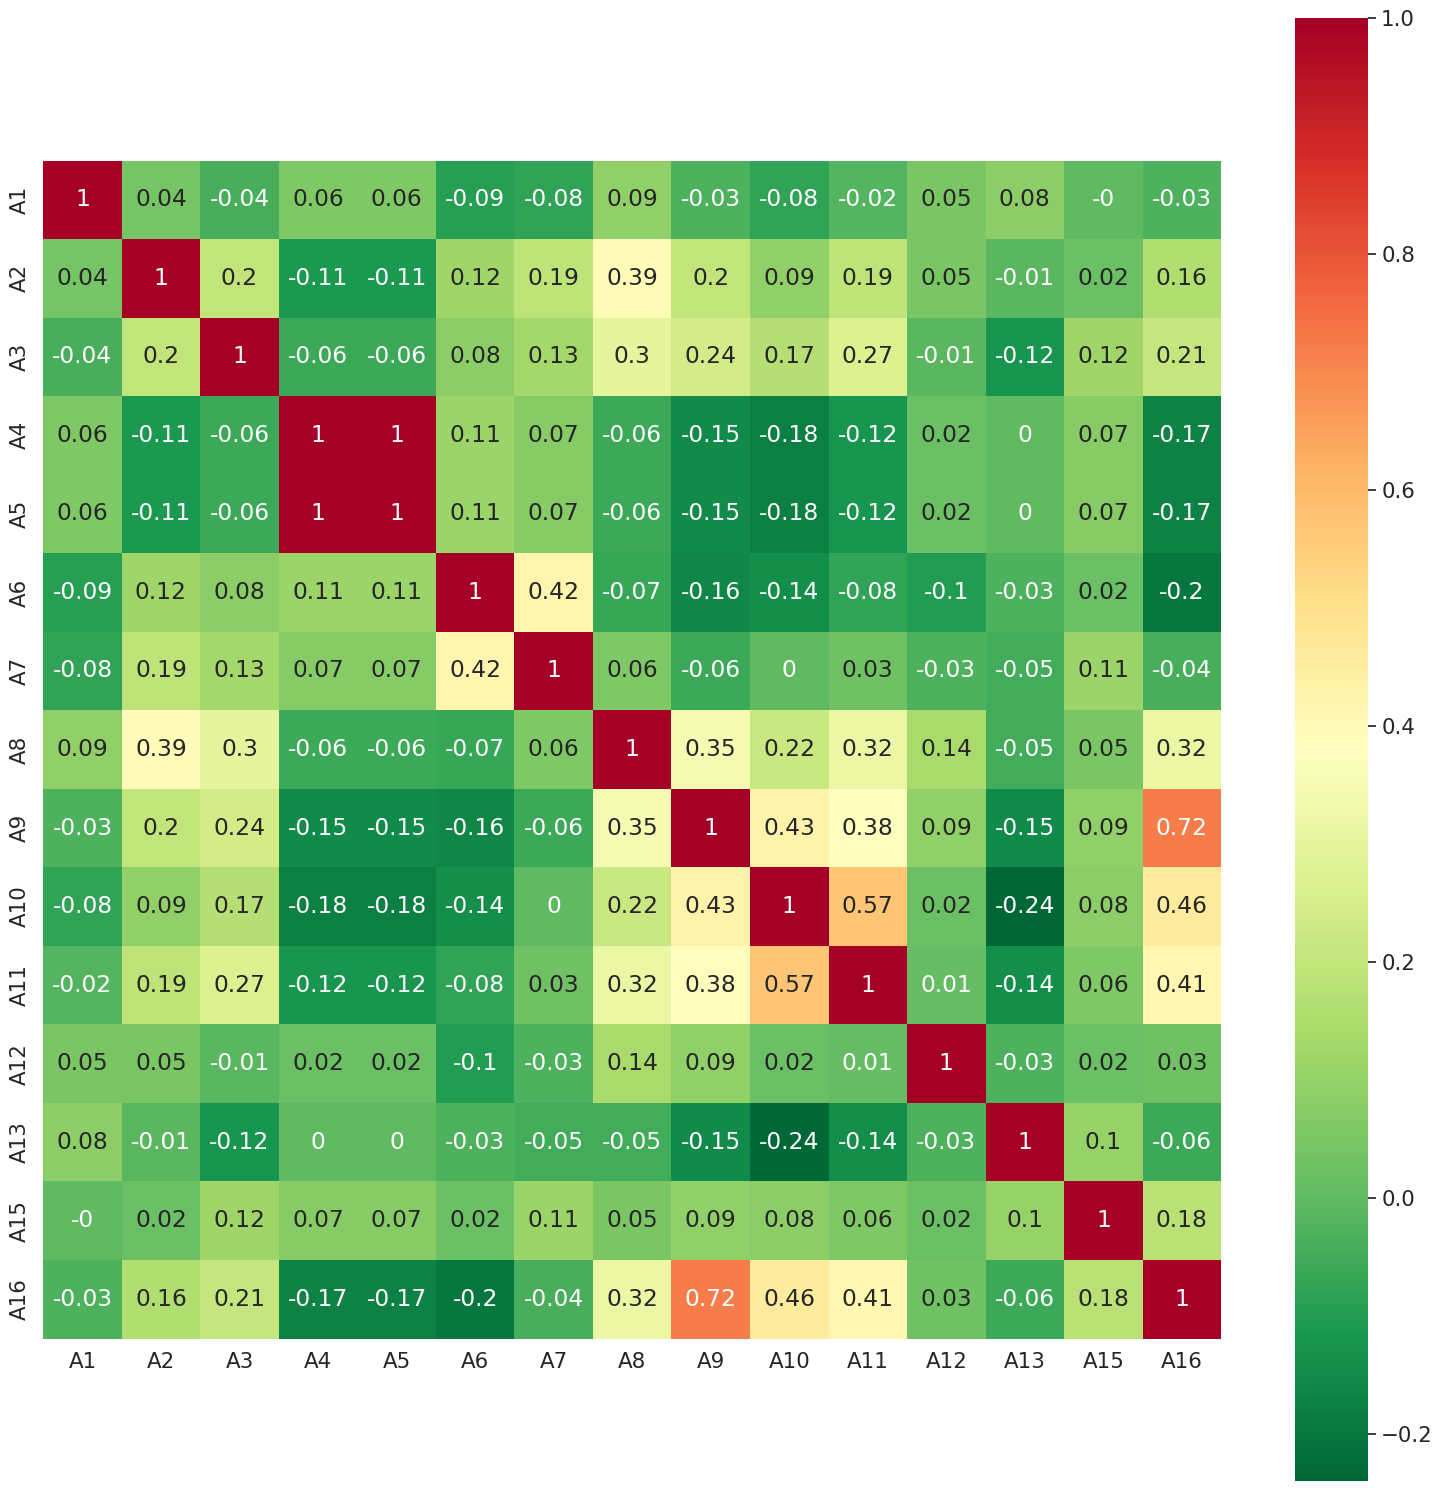

In [68]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

A9 berpengaruh positif terhadap label A16

Jika 0,8/0,9 keatas harus dihapus, karena sangat berpengaruh sekali

### Hapus Fitur Berkorelasi 1

A5 dan A4 korelasinya satu, maka salah satu harus di hapus

In [69]:
dataset.drop(['A5'], axis="columns", inplace=True)

### cek boxplot

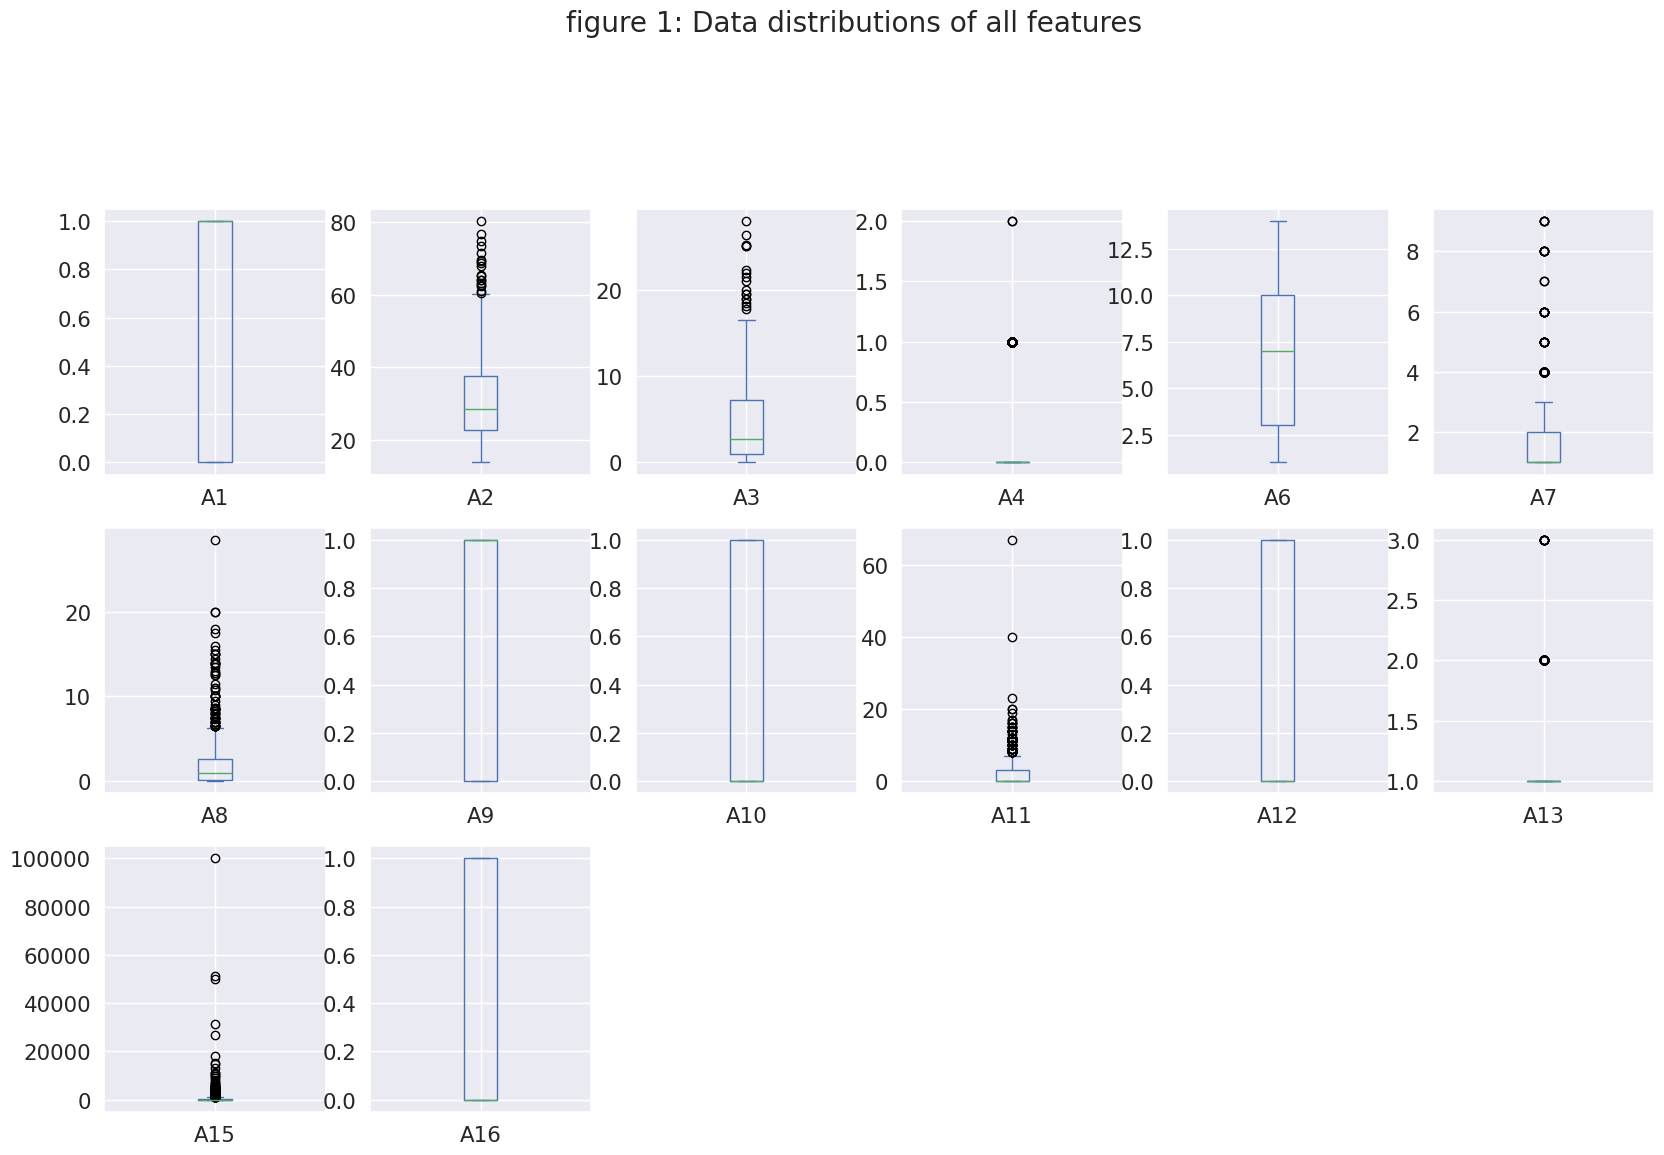

In [70]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

## BAB 7 – (J.62DMI00.010.1) menentukan label data

**Tentukan Label**

In [71]:
y = dataset['A16']

In [72]:
y

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: A16, Length: 690, dtype: int64

In [73]:
X = dataset.drop(['A16'], 1)

<ipython-input-73-affc905b0602>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop(['A16'], 1)


In [74]:
X

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,30.83,0.000,0,1,1,1.25,1,1,1,0,1,00202,0
1,0,58.67,4.460,0,2,2,3.04,1,1,6,0,1,00043,560
2,0,24.50,0.500,0,2,2,1.50,1,0,0,0,1,00280,824
3,1,27.83,1.540,0,1,1,3.75,1,1,5,1,1,00100,3
4,1,20.17,5.625,0,1,1,1.71,1,0,0,0,2,00120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,1,11,2,1.25,0,0,0,0,1,00260,0
686,0,22.67,0.750,0,7,1,2.00,0,1,2,1,1,00200,394
687,0,25.25,13.500,1,13,4,2.00,0,1,1,1,1,00200,1
688,1,17.92,0.205,0,12,1,0.04,0,0,0,0,1,00280,750


<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

### Perlakukan data original

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=ukuran_test, random_state=42)

### Perlakuan data normal

In [76]:
X_norm = StandardScaler().fit_transform(X)

In [77]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=ukuran_test, random_state=42)

### Perlakuan data original PCA

In [78]:
pca = PCA(random_state=42)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of features:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of features:             0           1          2         3         4         5         6   \
0 -1017.341851   23.514217  -1.397628 -3.217856  5.052344 -4.409554 -1.000399   
1  -457.655675 -136.789717  26.038476 -1.844893  5.604962 -3.732727 -3.141683   
2  -193.189252   99.912201  -7.129284 -2.364334  3.236451 -3.738568  0.076582   
3 -1014.543450  -78.496755  -4.195861  1.057622  6.598738 -3.546401  0.786079   
4 -1017.504055  -58.457096 -11.909616  0.933913  0.534945 -6.015213 -0.356830   

         7         8         9         10        11        12        13  
0  0.226012 -0.501380  0.501535 -0.658510  0.110703 -0.149395  0.053860  
1  0.558036 -0.556162  0.642284  0.367710  0.272680 -0.060073  0.043592  
2  1.140678 -0.502293  0.674517  0.379031  0.122272  0.627661 -0.379468  
3  0.169423 -0.417980 -0.476380 -0.345995 -0.111636 -0.126852  0.037577  
4  0.244253  0.206000  0.409344 -0.387669 -0.246621  0.913611  0.486053  
Explained variance ratio: [9.98882207e-01 1.109890

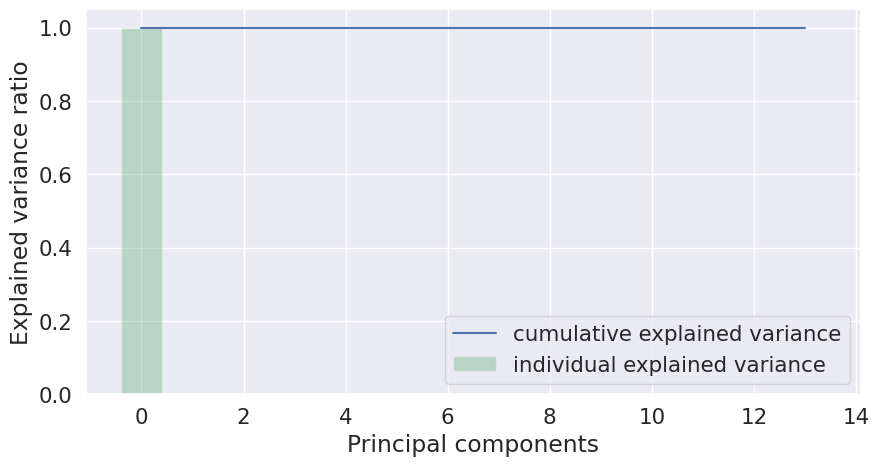

Cumulative explained ratio: [0.99888221 0.9999921  0.99999739 0.99999844 0.99999912 0.99999962
 0.9999999  0.99999996 0.99999997 0.99999998 0.99999999 0.99999999
 1.         1.        ]


In [79]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

Minimal ambil PC 2/3

In [80]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC0','PC1'])

In [81]:
ori_pca

,PC0,PC1
0,-1017.341851,23.514217
1,-457.655675,-136.789717
2,-193.189252,99.912201
3,-1014.543450,-78.496755
4,-1017.504055,-58.457096
...,...,...
685,-1017.226103,81.487486
686,-623.346666,20.761601
687,-1016.344145,21.434360
688,-267.189334,100.084813


PC 1 = 14 fitur yang dikompres

In [82]:
X_train

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
178,0,18.42,9.250,0,2,1,1.210,1,1,4,0,1,00060,540
265,1,17.08,0.085,1,7,1,0.040,0,0,0,0,1,00140,722
352,1,22.50,11.500,1,3,1,1.500,0,0,0,1,1,00000,4000
529,1,43.25,25.210,0,2,2,0.210,1,1,1,0,1,00760,90
409,1,17.08,0.250,0,2,1,0.335,0,1,4,0,1,00160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,34.83,4.000,0,8,3,12.500,1,0,0,1,1,00000,0
106,1,28.75,1.165,0,6,1,0.500,1,0,0,0,2,00280,0
270,1,37.58,0.000,0,7,1,0.000,0,0,0,0,3,00000,0
435,1,19.00,0.000,1,13,4,0.000,0,1,4,0,1,00045,1


In [83]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=ukuran_test, random_state=42)

### Perlakuan data normal PCA

In [84]:
pca = PCA(random_state=42)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of features:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of features:          0         1         2         3         4         5         6   \
0  0.440884 -1.921976 -0.653480 -0.331340  0.288185  0.090293  1.068421   
1  2.287160 -0.040070 -0.971642 -0.892320  0.145501 -0.965313 -0.140502   
2 -0.553820 -0.906713 -1.066990  0.100487  0.200749 -1.051918 -0.431114   
3  1.331739 -2.128673  0.095863 -0.039225 -0.309717  0.260888 -0.146224   
4 -0.788091 -1.445578  0.438252 -1.821636  2.144180 -0.175654 -0.177284   

         7         8         9         10        11        12        13  
0  0.029168  0.337241 -1.061407 -0.332433  0.579879  0.501969 -0.556325  
1  1.112257  1.070755 -1.307690  0.598011 -0.140896  1.245755 -0.169697  
2  0.220786  1.302290 -0.658943 -0.348147  1.345036  0.177822  0.927969  
3  0.125844 -1.007970 -0.816969 -0.043231  0.369594 -0.018248 -0.173219  
4  0.249584 -0.268783  0.561767 -1.061127  1.217958  0.458090  0.303137  
Explained variance ratio: [0.18958176 0.12098537 0.09440847 0.080408   0.07671287 0.07

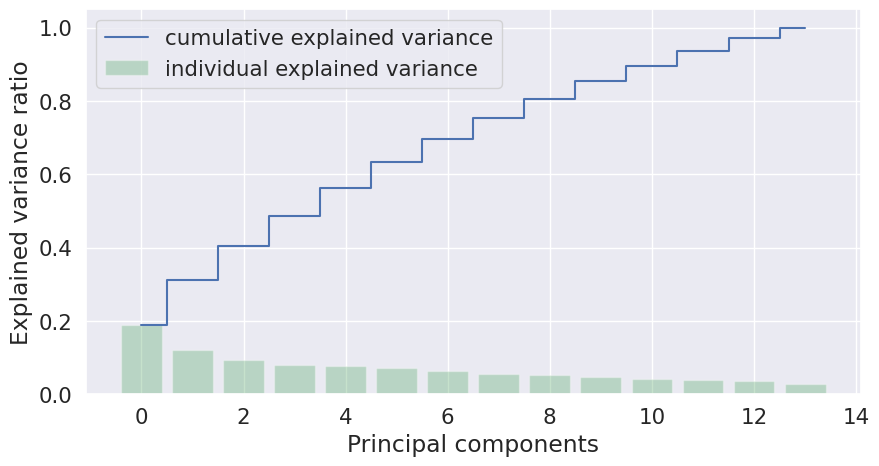

Cumulative explained ratio: [0.18958176 0.31056714 0.40497561 0.4853836  0.56209647 0.63315249
 0.69727656 0.75321607 0.80621001 0.85364886 0.89617775 0.93614655
 0.97276987 1.        ]


In [85]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

misal mau ambil 0.85, karena menyimpan 80% informasi dari data

In [86]:
pca = PCA(n_components=9, random_state=42)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])


In [87]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=ukuran_test, random_state=42)

## BAB 8 – (J.62DMI00.013.1) membangun model

### menggunakan Decision Tree

In [88]:
parameters_dt = {
                "model__max_depth": np.arange(1,10),
                "model__min_samples_leaf": np.arange(1,10,2),
                "model__min_samples_split": np.arange(2,10),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [89]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

#### Pemodelan data original

In [90]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [91]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [92]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=3,
                                        min_samples_split=8,
                                        random_state=42))])

### Parameter Optimal

In [93]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 7
model__min_samples_leaf: 3
model__min_samples_split: 8
model__random_state: 42


#### Pemodelan data original PCA

In [94]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [95]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [96]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=42))])

In [97]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 5
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data normal

In [98]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [99]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [100]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=3,
                                        min_samples_split=8,
                                        random_state=42))])

In [101]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 7
model__min_samples_leaf: 3
model__min_samples_split: 8
model__random_state: 42


#### Pemodelan data normal PCA

In [102]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [103]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [104]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        min_samples_leaf=5, random_state=42))])

In [105]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 7
model__min_samples_leaf: 5
model__min_samples_split: 2
model__random_state: 42


## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan

### evaluasi data original

In [106]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.9254658385093167
Precision pada training set:  0.9254658385093167
Recall pada training set:  0.9254658385093167
Akurasi pada test set:  0.7681159420289855
Precision pada test set:  0.7681159420289855
Recall pada test set:  0.7681159420289855



*   Akurasi,presisi,recall = sama, maka preprocessing kita sudah benar
*   Misal naik turun/beda, ada yang keliru sama preprocessing kita

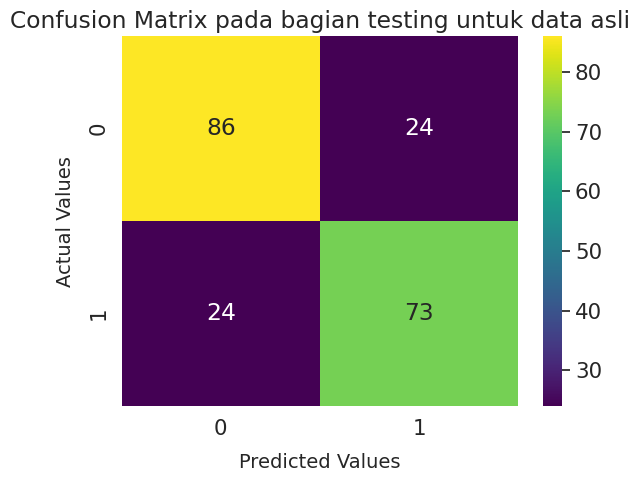

In [107]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi data original PCA

In [108]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.7743271221532091
Precision pada training set:  0.7743271221532091
Recall pada training set:  0.7743271221532091
Akurasi pada test set:  0.6521739130434783
Precision pada test set:  0.6521739130434783
Recall pada test set:  0.6521739130434783


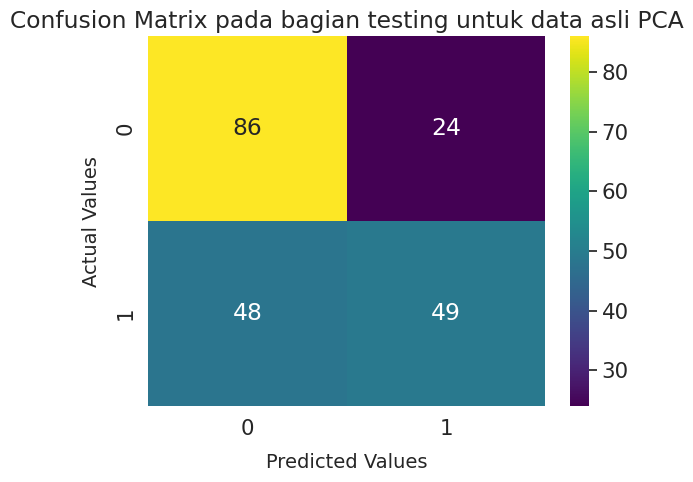

In [109]:
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli PCA')
plt.show()

### Evaluasi data normal

In [110]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.9254658385093167
Precision pada training set:  0.9254658385093167
Recall pada training set:  0.9254658385093167
Akurasi pada test set:  0.7681159420289855
Precision pada test set:  0.7681159420289855
Recall pada test set:  0.7681159420289855


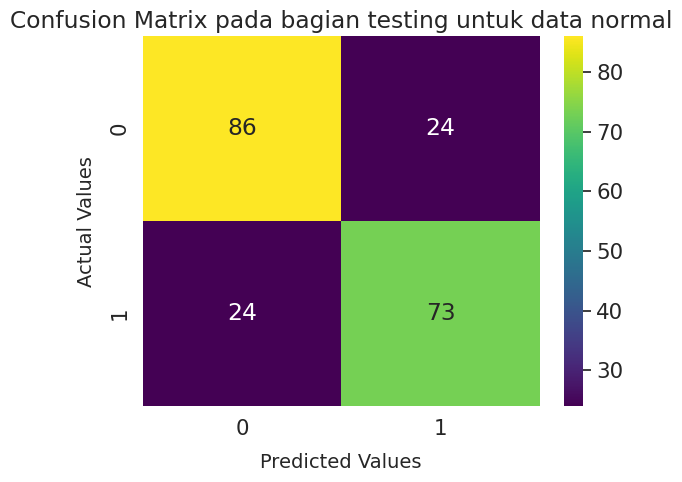

In [111]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normal')
plt.show()

### Evaluasi data normal PCA

In [112]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.9109730848861284
Precision pada training set:  0.9109730848861284
Recall pada training set:  0.9109730848861284
Akurasi pada test set:  0.7632850241545893
Precision pada test set:  0.7632850241545893
Recall pada test set:  0.7632850241545893


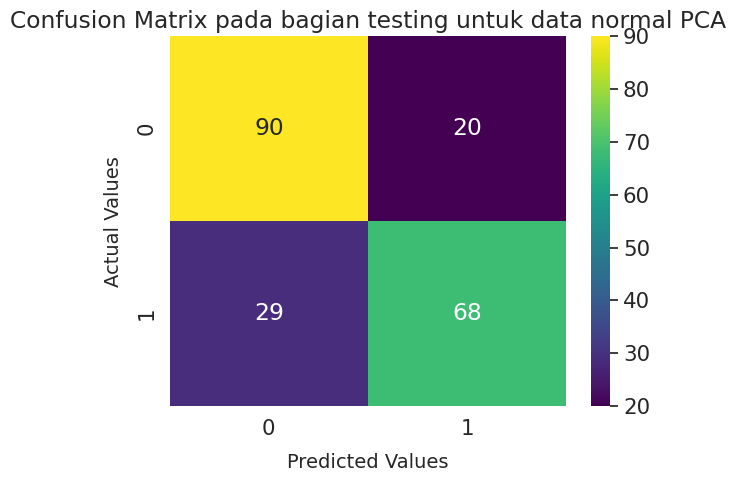

In [113]:
sns.heatmap(confusion_matrix(Y_test_norm_pca,norm_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normal PCA')
plt.show()

In [114]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Machine Learning PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
          ('Machine Learning PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
         ]

In [122]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Original,0.925466,0.768116
1,Machine Learning Data Normalisasi,0.925466,0.768116
2,Machine Learning PCA Data Original,0.774327,0.652174
3,Machine Learning PCA Data Normalisasi,0.910973,0.763285


Data ori dan Normalisasi kok sama? karena deccision tree punya kelebihan, ketika diproses ori atau normalisasi hasilnya sama

In [123]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('Machine Learning PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
                        ('Machine Learning PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
                    ]

### Data Testing

In [129]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Data Original,0.768116,0.768116,0.768116
1,Machine Learning Data Normalisasi,0.768116,0.768116,0.768116
2,Machine Learning PCA Data Original,0.652174,0.652174,0.652174
3,Machine Learning PCA Data Normalisasi,0.763285,0.763285,0.763285


<ipython-input-130-2f10045df05b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
<ipython-input-130-2f10045df05b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])


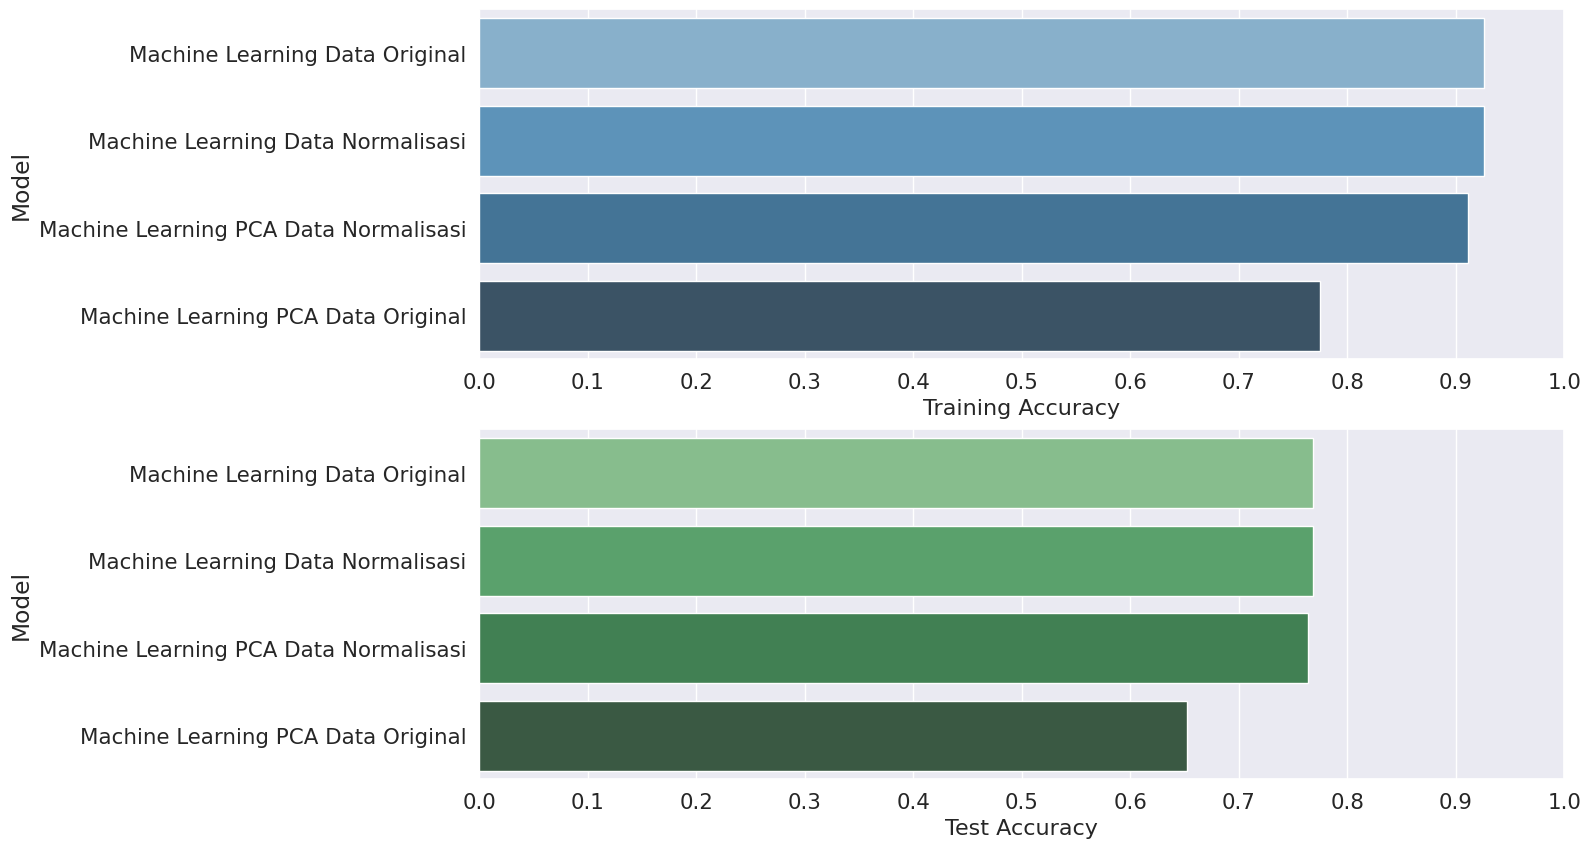

In [130]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data original)

In [131]:
from sklearn import tree

In [ ]:
# feature_importances = ori_classifier_dt.best_estimator_.named_steps["model"].feature_importances_
# feature_importances

In [132]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    print(df_features_importance.sort_values(by='coef',ascending=False))
    return df_features_importance
Analize_Feature(ori_classifier_dt,X_test)

   name      coef
7    A9  0.663926
12  A14  0.063473
9   A11  0.060107
6    A8  0.045303
13  A15  0.040348
11  A13  0.031890
1    A2  0.027967
4    A6  0.027038
2    A3  0.020106
5    A7  0.010458
3    A4  0.009385
0    A1  0.000000
8   A10  0.000000
10  A12  0.000000


,name,coef
0,A1,0.000000
1,A2,0.027967
2,A3,0.020106
3,A4,0.009385
4,A6,0.027038
5,A7,0.010458
6,A8,0.045303
7,A9,0.663926
8,A10,0.000000
9,A11,0.060107


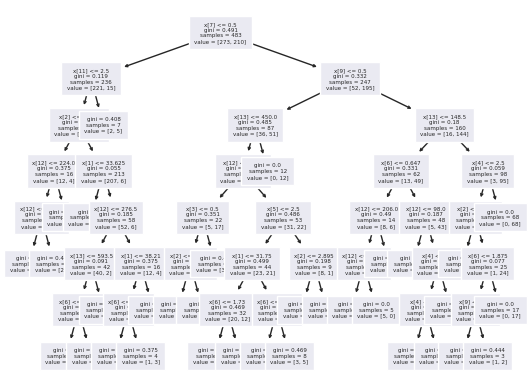

In [133]:
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],fontsize=4)
plt.show()

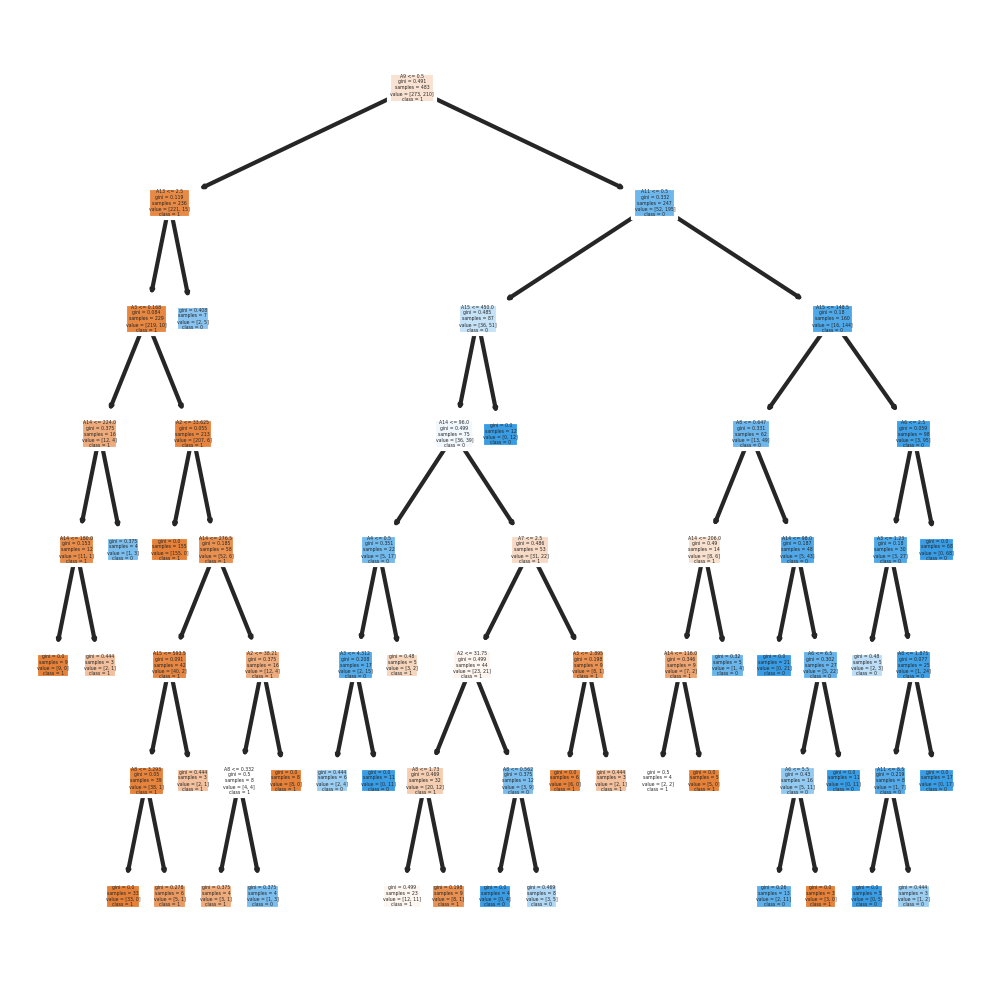

In [134]:
fn=["A1","A2","A3","A4","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"]
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

cara baca:
Jika Bilirubin <=2.45 maka ke node kiri, selain itu ke kanan.

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data PCA Normalisasi)

In [135]:
Analize_Feature(norm_pca_classifier_dt,X_test_norm_pca)

  name      coef
0  PC0  0.626803
7  PC7  0.109714
1  PC1  0.085478
8  PC8  0.059408
4  PC4  0.035620
6  PC6  0.033465
2  PC2  0.023701
3  PC3  0.017992
5  PC5  0.007821


,name,coef
0,PC0,0.626803
1,PC1,0.085478
2,PC2,0.023701
3,PC3,0.017992
4,PC4,0.035620
5,PC5,0.007821
6,PC6,0.033465
7,PC7,0.109714
8,PC8,0.059408


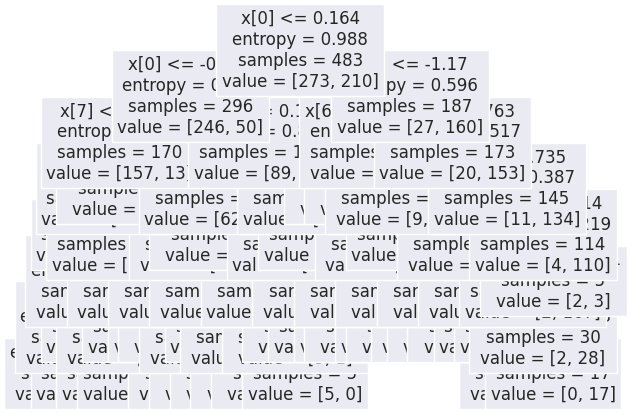

In [136]:
tree.plot_tree(norm_pca_classifier_dt.best_estimator_.named_steps["model"],fontsize=12)
plt.show()

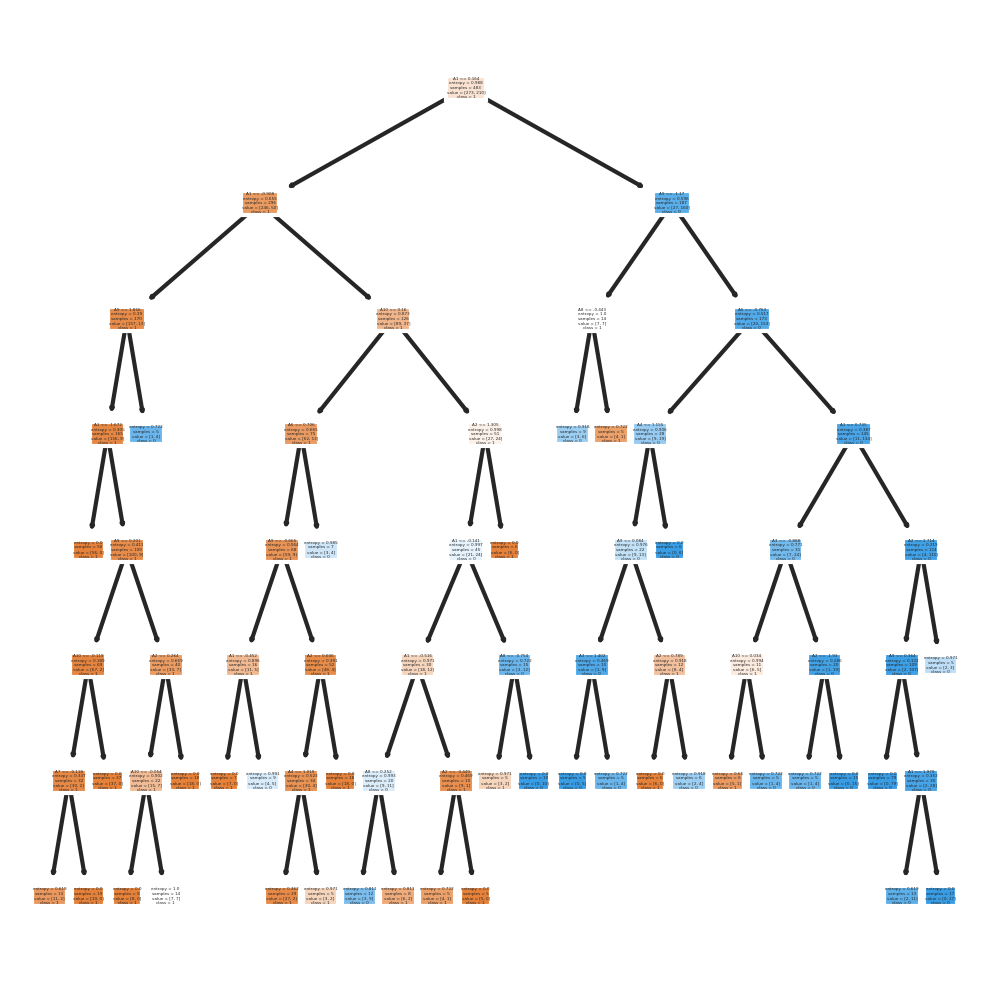

In [137]:
fn=["A1","A2","A3","A4","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15"]
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(norm_pca_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')